# Imports

In [1]:
import numpy as np                                                              # Linear Algebra

import pandas as pd                                                             # Data Processing
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import datetime as dt                                                           # DateTime Manipulation

from geopy.distance import great_circle, vincenty                               # geospatial manipulations
from shapely.geometry import MultiPoint
from sklearn.cluster import DBSCAN

%matplotlib inline
import matplotlib.pyplot as plt                                                 # visualizations
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split as tts                     # data splitting


import category_encoders as ce                                                  # preprocessing
from sklearn.impute import SimpleImputer                                        
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, LogisticRegression           # models
from sklearn.ensemble import GradientBoostingRegressor as GBR

from sklearn.pipeline import make_pipeline                                      # pipeline engineering

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV            # hyperparameter tuning

from sklearn.metrics import mean_absolute_error, r2_score                       # model scoring



import datetime as dt

ModuleNotFoundError: No module named 'numpy'

# Load the Data

In [3]:
PATH = r"C:\\Users\\btros\\OneDrive\\Documents\\LSDS-Unit-2-Project\\raw_csvs"

file = r"\\911_Calls_for_Service.csv"

df = pd.read_csv(PATH+file, low_memory = False)

In [4]:
#   Make an original copy in the event anything gets FUBAR

df_copy = df

In [4]:
df = df_copy

In [5]:
df

,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,call_timestamp,precinct_sca,respondingunit,officerinitiated,intaketime,dispatchtime,traveltime,totalresponsetime,time_on_scene,totaltime,neighborhood,block_id,council_district,longitude,latitude,oid
0,-83.197290,42.365373,201626502993,DPD,W Chicago St & Greenfield Rd,48227,2,843020,UNKNOWN PROBLEM,UNKPROB,2016-09-22T00:22:20.000Z,0207,,No,1.4,20.6,8.5,31.9,23.0,54.9,We Care Community,2.616354e+14,7.0,-83.197290,42.365373,2451849
1,-83.062263,42.353715,201626502997,DPD,Woodward Ave & Garfield St,48201,3,843030,INVESTIGATE PERSON,INVPERS,2016-09-22T00:24:34.000Z,39A,NaN,No,1.1,0.6,0.0,2.1,1.7,3.8,Midtown,2.616352e+14,6.0,-83.062263,42.353715,2451850
2,-83.273309,42.378907,201626503003,DPD,Riverview St & Fullerton St,48223,3,825030,DISTURBANCE,DISTURB,2016-09-22T00:26:30.000Z,63A,NaN,No,2.5,NaN,NaN,NaN,NaN,NaN,Castle Rouge,2.616354e+14,1.0,-83.273309,42.378907,2451851
3,-83.263215,42.369159,201626503005,DPD,Elmira St & Bramell St,48239,2,804020,PANIC / DURESS ALARM,PANIC,2016-09-22T00:26:46.000Z,66A,NaN,No,0.8,70.5,7.0,78.7,21.0,99.6,West Outer Drive,2.616355e+14,7.0,-83.263215,42.369159,2451852
4,-83.067557,42.425842,201626503006,DPD,E Nevada St & Revere St,48212,2,842020,ONE DOWN OR OVER THE WHEEL,OD,2016-09-22T00:25:29.000Z,117A,NaN,No,0.9,3.8,0.0,4.7,35.1,39.9,Davison,2.616351e+14,3.0,-83.067557,42.425842,2451853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451111,-83.235526,42.346812,201931803380,DPD,Sawyer St & Evergreen Rd,48228,2,TS,TRAFFIC STOP,TRF STOP,2019-11-14T23:46:45.000Z,69B,,Yes,0.0,0.0,0.0,0.0,17.3,17.3,Warrendale,2.616355e+14,7.0,-83.235526,42.346812,4900844
2451112,-83.247440,42.407702,201931803381,DPD,Burt Rd & Puritan St,48219,3,814035,PARKING COMPLAINT,PARK,2019-11-14T23:47:34.000Z,810B,NaN,No,1.4,40.9,7.7,49.9,12.9,62.8,Miller Grove,2.616354e+14,1.0,-83.247440,42.407702,4900845
2451113,-83.086606,42.365399,201931803387,DPD,Poe St & W Grand Blvd,48208,3,W8190,TOWING DETAIL,TOW,2019-11-14T23:50:42.000Z,1008,,Yes,0.0,0.0,0.0,0.0,0.3,0.3,Henry Ford,2.616353e+14,5.0,-83.086606,42.365399,4900846
2451114,-82.943778,42.430549,201931803391,DPD,Lakepointe St & Moross Rd,48224,2,TS,TRAFFIC STOP,TRF STOP,2019-11-14T23:51:34.000Z,0907,DVN6026,Yes,0.0,0.0,0.0,0.0,33.5,33.5,Moross-Morang,2.616350e+14,4.0,-82.943778,42.430549,4900847


# Initial Examination

In [86]:
#  Take a quick look at the DataFrame and make sure that everything loaded in properly(i.e. column headers)

df.head(1)

,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,call_timestamp,precinct_sca,respondingunit,officerinitiated,intaketime,dispatchtime,traveltime,totalresponsetime,time_on_scene,totaltime,neighborhood,block_id,council_district,longitude,latitude,oid
0,-83.19729,42.365373,201626502993,DPD,W Chicago St & Greenfield Rd,48227,2,843020,UNKNOWN PROBLEM,UNKPROB,2016-09-22T00:22:20.000Z,0207,,No,1.4,20.6,8.5,31.9,23.0,54.9,We Care Community,2.616354e+14,7.0,-83.19729,42.365373,2451849


In [ ]:
#  Columns X and Y look to be duplicates of the longitude and latitude columns so we will drop them
#  incident_id and ObjectId are also redundant

def reduce_features(df):
    cols = ['X', 'Y', 'incident_id']
    
    df = df.drop(columns=cols)
    
    return df

df = reduce_features(df)

In [ ]:
#  Check for columns with null values

df.isnull().sum().sort_values(ascending=False)

In [ ]:
#   Looks like none of the columns containing missing values contain any information that we will need for our model so we will drop them and save the observations

def drop_null_cols(df):
    
    columns_with_null = df.isnull().sum().sort_values(ascending=False)[:9].index.tolist()
    df = df.drop(columns=columns_with_null)
    
    return df

In [ ]:
df = drop_null_cols(df)

In [ ]:
#  Check the cardinality of the categorical columns

df.select_dtypes(exclude='number').nunique().sort_values(ascending=False)

In [ ]:
#  Examine the basic statistics of the numerical columns

df.describe()

# TODO:

- ~~Looks like the call_timestamp column contains both the date and time, while being stored as a string~~
    - ~~Cast the column to DateTime type~~
    - ~~Extract the relevant information from the column~~
        - ~~Year~~
        - ~~Month~~
        - ~~Day~~
        - ~~Day of week~~
        - ~~Week of year~~
        - ~~Hour ~~
        - ~~Time of Day (i.e. morning or night etc.)~~
        
- ~~Filter out any potential data entry errors or extreme outliers from the latitude and longitude columns~~

- ~~Further investigation of the categorical columns to gather ideas about cardinality reduction~~


## DateTime

In [ ]:
def extract_timestamp_feats(df, column):
    
    # Cast the column to DateTime type
    df[column] = pd.to_datetime(df[column])
    
    # Extract date related features
    df['year']  = df[column].dt.year
    df['month'] = df[column].dt.month
    df['day']   = df[column].dt.day
    df['call_dow']   = df[column].dt.dayofweek
    df['week']  = df[column].dt.week
    
    # Extract time related features
    df['hour']   = df[column].dt.hour
    
    
    
    
    """
    Extacts the time of day from the hour value by dividing by the hour knife
    1 = Morning  (0400 - 1000h)
    2 = Midday   (1000 - 1600h)
    3 = Evening  (1600 - 2200h)
    4 = Night    (2200 - 0400h)
    """    
    
    hour_knife = 6
    df['part_of_day'] = ((df['hour'] + 2) / hour_knife).astype(int)
    df['part_of_day'] = df['part_of_day'].replace(0, 4)
    
    # Drop the now redundant column
    df = df.drop(columns=column)
    
    return df

In [ ]:
df = extract_timestamp_feats(df, 'call_timestamp')

In [ ]:
df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(5,3))
ax = sns.countplot(x="call_dow", data=df)
ax.axes.set_xticklabels(["MON", "TUE","WED","THU","FRI","SAT","SUN"]);

## Latitude and Longitude

In [ ]:
#  Let's examine those observations which fall outside the geographic boundries for the city of Detroit

print((df.loc[((df['longitude'] < -83.28) | (df['longitude'] > -82.9) ) | ((df['latitude'] < 42.25) | (df['latitude'] > 42.47 ))]).shape)

outliers = (df.loc[((df['longitude'] < -82.91) | df['longitude'] > 83.3 ) | ((df['latitude'] < 42.25) | (df['latitude'] > 42.5 ))])


 Looks like there's definitely a **more than non-significant amount** of these observations but I don't believe there is enough to skew the data if we remove them, so we will do just that.

In [ ]:
def filter_geo_outliers(df):
    """
    Filters out the outliers in the data where the latitude and longitudes 
    exist outside the geographic limits of the city of Detroit
    """
    
    n_bound =  42.46
    e_bound = -82.91
    s_bound =  42.25
    w_bound = -83.28
    
    #  Retains only those observations within the geographic boundaries
    df = df.loc[((df['longitude'] > w_bound) & (df['longitude'] < e_bound)) &
                ((df['latitude'] > s_bound) & (df['latitude'] < n_bound ))]
    
    *

In [ ]:
df = filter_geo_outliers(df)

In [ ]:
df.shape

In [ ]:
#  Lets make a visualization to ensure we didn't miss any outliers (hint: I missed some the first run-through)

def plot_lat_lon(df):
    
    fig, ax = plt.subplots(figsize=(12, 8))
#     img = plt.imread(r"C:\Users\btros\Downloads\detroit_map.jpg")
#     ax.imshow(img)
    ax = sns.scatterplot(data=df, x='longitude', y='latitude', alpha=0.1)
#     ax = sns.scatterplot(x=[1,2,3], y=[2,4,6], alpha=0.1)
    ax.set_facecolor('.2')
    fig.set_facecolor('.2')
    
    return plt.show();

In [ ]:
plot_lat_lon(df)

## Cardinality Reduction

In [ ]:
df.select_dtypes(exclude="number").nunique().sort_values(ascending=False)

There are two columns that offer descriptions of the incident pertaining to the 911 call, calldescription and category, which seem to be near duplicates, however the former has a slightly higher level of variance. So for this model we will keep the calldescription column, as for the other columns they are of no use to this model.

In [ ]:
def remove_categoricals(df):
    unneeded = df.select_dtypes(exclude="number").nunique().index.tolist()
    unneeded.remove('calldescription')

    df = df.drop(columns=unneeded)
    
    return df

In [ ]:
df = remove_categoricals(df)

In [ ]:
df.head()

In [28]:
def clean_observations(df):
    
    """
    Removing observations where the call description
    is not related to emergency services
    """
    col = 'calldescription'
    
    unrelated_calls = ['START OF SHIFT INFORMATION', 'CALL BACK DESK', 'REMARKS',
                      'EMPLOYEE CALL IN / TIME OFF', 'NOTIFICATION(S) MADE',
                      'TIBURON HISTORICAL DATE', 'BLUE LIGHT PHONE MALF']
    
    for call in unrelated_calls:
        df = df.loc[df[col] != call]
    
    return df

In [29]:
df = clean_observations(df)

In [30]:
df.calldescription.value_counts()

def filter_calldescription(df, col='calldescription'):
    
    #  List of call descriptions according to which service responded
    
    police = ['TRAFFIC STOP', 'SPECIAL ATTENTION', 'DISTURBANCE', 'INVESTIGATE PERSON',
              'ASSAULT AND BATTERY', 'UNKNOWN PROBLEM', 'TOWING DETAIL', 'FELONIOUS ASSAULT IP',
              'LARCENY REPORT', 'AUTO X UNK INJ / IMPAIRED', 'BUS BOARDING', 'PERSON WITH WEAPON',
              'VERIFIED ALR / PERSON W/O CODE', 'UDAA REPORT', 'BURGLARY OCCUPIED RESD I/P',
              'SHOTS FIRED IP', 'INVESTIGATE AUTO', 'MALICIOUS DESTRUCTION I/P', 'MISCELLANEOUS TRAFFIC',
              'PANIC / DURESS ALARM', 'FRAUD REPORT', 'BUILDING CHECK', 'VICIOUS ANIMAL', 'LARCENY I/P OR J/H',
              'THREATS REPORT', 'RECOVER AUTO', 'HOLD UP ALARM AND MOW', 'MALICIOUS DESTRUCTION RPT', 
              'BURGLARY OTHER', 'PARKING COMPLAINT', 'WELL BEING CHECK', 'MENTAL VIOLENT NOT ARMED',
              'ASSIST OTHER', 'INFORMATION/NON-CRIMINAL RPT', 'ASSAULT AND BATTERY REPORT', 'AUTO X REPORT',
              'BURGLARY OCCUPANT AWAY I/P', 'MISSING REPORT',  'NARCOTICS I/P', 'BURGLARY RESIDENCE REPORT',
              'MISSING SERIOUS', 'ALARM UNKNOWN CAUSE', 'SUICIDE THREAT', 'CHILD /  ADULT ABUSE',  'WNTD WRRNT FELONY',
              'ADMIT OR E/E', 'FELONIOUS ASSAULT JH', 'ASSIST CITIZEN', 'SPECIAL ATTENTION / DETAIL', 'DEAD PERSON OBSERVED',
              'LOST PROPERTY', 'SUICIDE I/P', 'TRANSPORT PRISONER', 'ROBBERY ARMED IP-ANY', 'RECOVERED / FOUND PROPERTY',
              'SAFEWALK', 'CHILD / ADULT ABUSE REPORT', 'BREAKING AND ENTERING AUTO I/P', 'FELONIOUS ASSAULT REPORT',
              'RAID - EXECUTE SEARCH WARRANT', 'MENTAL VIOLENT - ARMED', 'RAPE REPORT', 'HARASSMENT REPORT',
              'BURGLARY BUSINESS IP', 'KIDNAPPING', 'PPO VIOLATION I/P', 'LEWD AND LASCIVIOUS IP', 'AID MOTORIST / CHILD LOCKED IN',
              'BREAKING & ENTERING AUTO RPT', 'DV A/B I/P-J/H', 'ROBBERY NOT ARMED I/P', 'SQUATTER DISTURBANCE',
              'SCRAP STRIP  BLDG  IP', 'ASSAULT AND BATTERY I/P', 'AUTO OR PED H&R REPORT', 'FRAUD I/P',
              'AUTO X HIT & RUN W/ INJ', 'BURGLARY OCCUP RESD REPT', 'RUBBISH LITTERING I/P', 'SHOTS J/H, EVIDENCE, REPT',
              'BE ON THE LOOK OUT', 'SHOOTING/CUTTING/PENT WND RPT', 'HOLDING PERSON', 'ARSON I/P', 'BURGLARY OTHER REPORT',
              'ANIMAL COMPLAINT', 'ARSON REPORT', 'ASSIST PERSONNEL', 'ROBBERY ARMED REPORT', 'VERIFY RETURN OF MISSING',
              'DDOT TROUBLE', 'WNTD WRRNT MISDEMEANOR', 'ROBBERY ARMED JH-ANY WEAPON',  'BURGLARY OCCUPANT AWAY J/H',
              'UDAA I/P', 'SCHOOL CROSSING', 'HAZARDOUS CONDITIONS', 'SENIOR CITIZEN ASSIST', 'ROBBERY NOT ARMED REPORT',
              'ONE OVER THE WHEEL', 'RAPE IP OR JH', 'PROPERTY DAMAGE NON-CRIMINAL', 'PEACE OFFICER DETAIL', 'BURGLARY BUSINESS REPORT',
              'BURGLARY BUSINESS J/H', 'CHILD(REN) HOME ALONE', 'DV F/A I/P-J/H', 'ESCORT', 'NARCOTICS REPORT', 'AID MOTORIST MISC',
              'PPO VIOLATION REPORT', 'RECOVER AUTO FELONY', 'LEWD AND LASCIVIOUS','VEHICLE FIRE', 'NOISE COMPLAINT', 
              'FOUND PERSON', 'MOLESTATION REPORT', 'PBT TEST', 'RESIDENTIAL STRUCTURE FIRE', 'ASSIST REF GAINING ENTRY',
              'ATM  ALARM',  'WSPD - BURGLARY ALR', 'ALTERED LOC OR UNK PROBLEM', 'PAST GUNSHOT OR STABBINIG', 'AID MORTORIST MISC',
              'BOMB THREAT REPORT',  'ASSAULT  NOT DANGEROUS OR PREV', 'WRKABLE ARRST/OBV OR EXP DEATH',
              'CITIZEN RADIO PATROL IN TROUBL', 'SCHOOL THREATS J/H & RPT', 'TRAFFIC W/ NO INJURIES',  'MISCELLANEOUS ACCIDENT',
              'MOLESTATION', 'BANK ALARM','KIDNAPPING REPORT', 'K-9 DEPLOYMENT', 'SUSPICIOUS PACKAGE', 'DPDA', 
              'WSPD - BURGLARY ALARM', 'VIP THREATS I/P', 'PERSON W/  A WEAPON REPORT', 'AID MOTORIST CHILD LOCKED INSD',
              'ANIMAL FIGHT', 'BOMB THREAT', 'PERSONNEL IN TROUBLE', 'BURGLARY ALARM', 'DV PRS WITH A WEAP I/P-J/H',
              'ASSAULT AND BATTERY J/H', 'AUTO X - BLDG / DWELL', 'PURSUIT - VEHICLE OR FOOT', 'BACKGROUND/LEIN CHK / LIVESCAN',
              'INVESTIGATE YOUTH(S)', 'SHOT STABBED UNK OR OBV DEATH', 'SCRAP STRIP BLDG JH', 'TRANSPORT PRISONER-OTH AGT', 'BOMB SCARE',
              'SMOKING VIOLATIONS', 'DV A/B RPT', 'HPPD BURG ALRM', 'EXTORTION IP', 'EXTORTION JH OR REPORT',
              'OTHR OUTSIDE STRUCTURE FIRE', 'ATTEMPTED SUICIDE REPORT', 'VIP THREATS J/H OR REPORT', 'ASSAULT DANGEROUSOR SERIOUS',
              'TRAFFIC- MINOR INJURIES', 'SUICIDE THREAT OR ABNORM BEHAV', 'BURGLARY ALARM  W/ MOW', 'HPPD BURG ALRM  W/ MOW',
              'BACKGROUND CHECK / LIVESCAN', 'DV F/A RPT', 'CURFEW VIOLATION', 'YOUTH LOITERING/CONGREGATING']

    ems = ['ONE DOWN OR OVER THE WHEEL', 'AUTO X OR PED X - INJURIES', 'AUTO X HIT& RUN UNK INJURIES',
           'MENTAL VIOLENT NOT ARMED', 'MENTAL NOT VIOLENT', 'SHOOTING/CUTTING/PENT WOUND', 'MT EMS-TRO/ENTRY',
           'ONE DOWN/DRUG OD', 'ANIMAL BITES OR ATTACK DELTA', 'SHOT OR STABBED DELTA', 'PREGNANCY OR CHILDBIRTH DELTA',
           'CHEST PAIN DELTA', 'ATYPICAL SEIZURE OR HX OR CVA', 'OB HEMORRHAGE LABOR OR BIRTH',
           'CHEST PAIN NORMAL BREATHING', 'INJURY NON DANGEROUS BODY PART', 'NON SUICIDAL OR NT THRTENING',
           'SICK PERSON DELTA', 'ANIMAL BITE OR ATTACK DELTA', 'FALL W SERIOUS HEMORRHAGE', 'CONT OR MULTI SEIZURES DELTA',
           'PORTABLE ALARM SYSTEM', 'FAINTING ALERT', 'SERIOUS HEMORRHAGE', 'BURNS DELTA  OR ECHO', 'HEADACHE - ADDITIONAL SYMPTONS',
           'NON RECENT OR SUPERFICIAL BITE', 'ASSAULT OR SEX ASSAULT DELTA', 'UNCONSCIOUS OR FAINTING DELTA', 'DV PRSN WITH WEAP RPT',
           'SCHOOL THREATS I/P', 'SICK NON PRIORITY COMPLAINTS', 'SUICIDE ATTEMPT DELTA', 'DANGEROUS HEMORRHAGE DELTA',
           'SERIOUS INJURIES', 'MINOR HEMORRHAGE', 'BREATHING PROBLEMS DELTA', 'CHEST PAIN W OR WO NOR BRETH', 'OVERDOSE DELTA',
           'OVER THE WHEEL',  'TRAFFIC INCIDENT W/ INJURIES', 'POSS DANGEROUS ANIMAL BITE', 'ONE DOWN/OVERDOSE',
           'MAJOR TRAFFIC INCIDENT DELTA', 'OVERDOSE NT ALRT OR UNK STATUS', 'MEDICAL ALARM OR UNK PROB','LIFE STATUS QUESTIONABLE DELTA']

    fire = ['FIRE ALARM TEST', 'FIRE ALARM', 'TEMPERATURE ALARM',  'ELEVATOR ENTRAPMENT', 'VEHICLE FIRE(FIELD)',
            'IRRADIATOR ROOM ALARM / TEST', 'HAZARD CONDITIONS NO FIRE', 'GRASS  FIRE', 'POWER LINES', 'ALR PT DISABLED / TIMEZONE CHG',
            'EXPLOSION/RUPTURE NO FIRE', 'ALARM MALFUNCTION',  'COMMERCIAL STRUCTURE FIRE', 'EXPLOSION',  'FIRE ALARMS ALL',
            'WEATHER RELATED', 'GRASS OR RUBBISH FIRE',  'SMOKE INVESTIGATION', 'WSPD - FIRES', 'ALARM MISUSE']
    
           
    df['police'] = np.where(df[col].isin(police), 1, 0)
    df['ems'] = np.where(df[col].isin(ems), 2, 0)
    df['fire'] = np.where(df[col].isin(fire), 3, 0)
    
    df['category'] = df['fire'] + df['ems'] + df['police']
    df['category'] = df['category'].replace(0, 1)  #  For some reason the Assault and Battery instances are not picked up
    
    
    defunct = ['police', 'ems', 'fire', col]
    
     #  Drop the no longer needed columns

    df = df.drop(columns=defunct)

    return df

In [31]:
df = filter_calldescription(df)

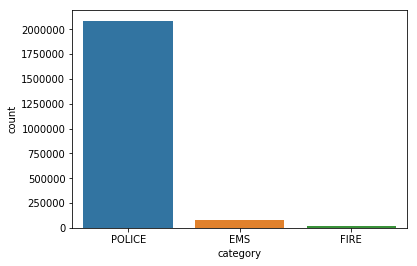

In [32]:
fig, ax = plt.subplots()
ax = sns.countplot(data=df, x='category')
ax.axes.set_xticklabels(['POLICE', 'EMS', 'FIRE']);

In [33]:
#  So it's obvious that calls to the police dominate the use of 911 services in Detroit so for 
#  scope of this project we will reduce the observations to only those requesting police assistance 

def police_only(df):
    df = df.loc[df.category == 1]
    df = df.drop(columns='category')
    
    return df

In [34]:
df = police_only(df)

# Feature Engineering

In [36]:
# We need to seperate the locations into a grid 

In [35]:
def geospatial_grid(df, lat, lon):
    # episolon is used to avoid assigning locations outside the grid
    epsilon = .0001
    
    # min and max of latitude and longitude
    lat_min = df[lat].min() - epsilon
    lat_max = df[lat].max() + epsilon
    
    lon_min = df[lon].min() - epsilon
    lon_max = df[lon].max() + epsilon
    
    # ranges
    lat_range = lat_max - lat_min
    lon_range = lon_max - lon_min
    
    # splits
    lat_knife = 10
    lon_knife = 15 
    
    # grid lengths
    lon_length = lon_range / lon_knife
    lat_length = lat_range / lat_knife
    
    # assigining the locations to a grid space
    
    df['lat_grid'] = (np.floor(((df[lat]-lat_min)/lat_length)))
    df['lon_grid'] = (np.floor(((df[lon]-lon_min)/lon_length)))
    
    
    # discard the now unneeded columns
    cols = [lat, lon]
    df = df.drop(columns=cols)
    
    return df

In [36]:
df = geospatial_grid(df, 'latitude', 'longitude')

In [37]:
grid_df = df.groupby(['lat_grid','lon_grid']).size().reset_index(name='call_count')

In [38]:
grid_df

,lat_grid,lon_grid,call_count
0,0.0,0.0,7
1,0.0,1.0,2
2,0.0,2.0,12
3,0.0,3.0,37
4,0.0,4.0,5448
5,0.0,5.0,2423
6,0.0,6.0,15
7,1.0,0.0,41
8,1.0,1.0,47
9,1.0,2.0,103


In [40]:
geoheatmap_df = grid_df.pivot(index='lat_grid',columns='lon_grid', values='call_count')

In [41]:
geoheatmap_df

lon_grid,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
lat_grid,,,,,,,,,,,,,,,
0.0,7.0,2.0,12.0,37.0,5448.0,2423.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,41.0,47.0,103.0,45.0,1426.0,9384.0,647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,119.0,194.0,25.0,103.0,31.0,6577.0,98905.0,7413.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN
3.0,56.0,546.0,4443.0,143.0,276.0,12493.0,25732.0,22374.0,20466.0,38390.0,1063.0,31.0,NaN,NaN,NaN
4.0,3298.0,15823.0,31702.0,14442.0,3725.0,16058.0,14369.0,14429.0,89211.0,71356.0,33254.0,12693.0,1244.0,NaN,NaN
5.0,3166.0,30495.0,35659.0,32945.0,28465.0,22934.0,27388.0,23693.0,94285.0,20246.0,28176.0,30669.0,11731.0,18375.0,1217.0
6.0,9048.0,14009.0,14537.0,33565.0,28302.0,27337.0,33131.0,19363.0,20354.0,2481.0,17420.0,17723.0,24485.0,18447.0,2092.0
7.0,16777.0,27409.0,28452.0,37333.0,39854.0,28035.0,13391.0,3360.0,8242.0,8144.0,6631.0,21982.0,22024.0,32330.0,20636.0
8.0,20151.0,29311.0,30684.0,28529.0,27985.0,23781.0,13697.0,19032.0,24211.0,23465.0,26518.0,31693.0,32914.0,32519.0,7913.0


In [42]:
#  We will need this process as function for later

def to_heatmap_format(df):
    grid_df = df.groupby(['lat_grid','lon_grid']).size().reset_index(name='call_count')
    geoheatmap_df = grid_fg.pivot(index='lat_grid',columns='lon_grid', values='call_count')
    
    return geoheatmap_df

In [43]:
#  Let's define a function for plotting these heatmaps

def plot_calls_grid(df):
    fig, ax = plt.subplots(figsize=(20,8))
    plt.title("Detroit 911 Calls by Geographic Location Halloween 2018",
             fontsize=24)

    ax = sns.heatmap(df,annot=True,fmt=".0f",cbar=False)

    # ax.set_ylim(len('lat_grid'), -1, -1)

    fig.set_facecolor('.1')
    ax.set_facecolor('.1')


    ax.invert_yaxis()
    
    return plt.show();

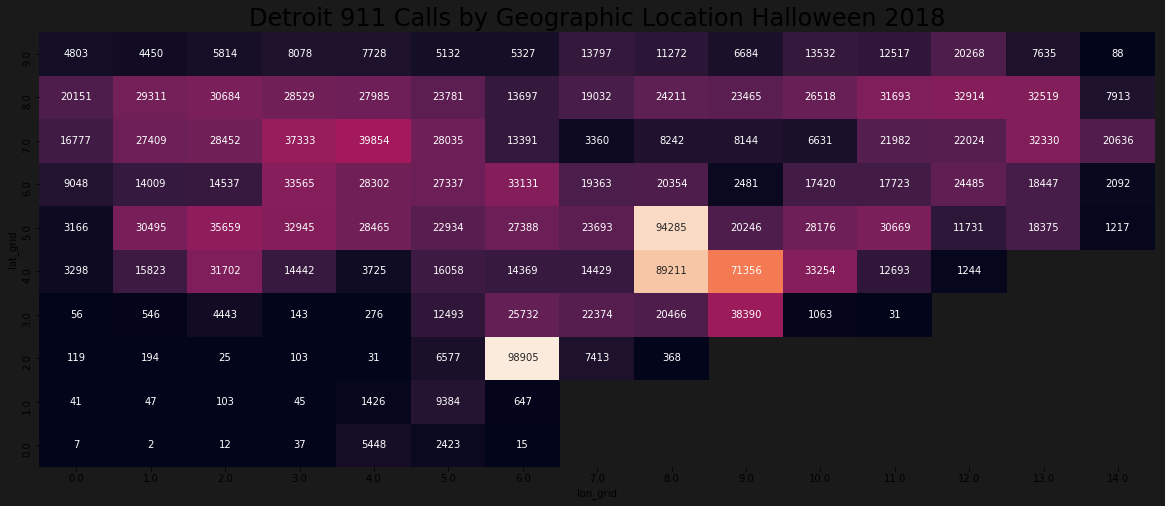

In [46]:
#  testing the function
plot_calls_grid(geoheatmap_df)

In [47]:
data_timeevents = tempy.groupby(['part_of_day']).agg({'category': np.sum}).reset_index()
fig, ax = plt.subplots(figsize=(5,3))

ax = sns.barplot(x="part_of_day", y="category", data=data_timeevents)
ax.axes.set_xticklabels(["Morning\n(4 - 10am)","Midday\n(10am - 4pm)","Evening\n(4-10pm)", "Night\n(10pm-4am)"])
ax.set_ylabel("Calls to Police")

NameError: name 'tempy' is not defined

In [49]:
df.head(1)

,oid,call_year,call_month,call_day,call_dow,call_week,call_hour,call_minute,part_of_day,lat_grid,lon_grid
0,2451849,2016,9,22,3,38,0,22,4,5.0,3.0


In [56]:
#  We need to create a function that will group the dataframe by selected parameters

def group_features(df):
    
    grouping_list = list(df.columns)
    grouping_list.remove('oid')
    grouping_list.remove('call_hour')
    grouping_list.remove('call_minute')
    grouped_df    = df.groupby(grouping_list).size().reset_index(name='count')
    
    return grouped_df
    


In [57]:
list(df.columns)

['oid',
 'call_year',
 'call_month',
 'call_day',
 'call_dow',
 'call_week',
 'call_hour',
 'call_minute',
 'part_of_day',
 'lat_grid',
 'lon_grid']

In [62]:
df = group_features(df)

In [71]:
df

,call_year,call_month,call_day,call_dow,call_week,part_of_day,lat_grid,lon_grid,count
0,2016,9,20,1,38,1,5.0,3.0,1
1,2016,9,20,1,38,1,5.0,4.0,1
2,2016,9,20,1,38,1,5.0,9.0,1
3,2016,9,20,1,38,1,7.0,3.0,1
4,2016,9,20,1,38,1,7.0,11.0,1
...,...,...,...,...,...,...,...,...,...
391832,2019,11,15,4,46,4,9.0,7.0,1
391833,2019,11,15,4,46,4,9.0,8.0,1
391834,2019,11,15,4,46,4,9.0,9.0,1
391835,2019,11,15,4,46,4,9.0,10.0,1


In [72]:
weather = pd.read_csv(r"C:/Users/btros/OneDrive/Documents/LSDS-Unit-2-Project/detroit_weather_wrangled.csv")

In [75]:
weather = weather.drop(columns="Unnamed: 0")

,year,month,day,part_of_day,weather_id,severe,temp_min,temp_max
0,2016,8,31,3,800.000000,0.0,66.704000,73.499000
1,2016,8,31,4,800.000000,0.0,62.600000,71.501000
2,2016,9,1,1,801.666667,0.0,59.300000,66.092000
3,2016,9,1,2,651.166667,0.0,67.444747,72.874747
4,2016,9,1,3,606.833333,0.0,66.117594,71.118594
...,...,...,...,...,...,...,...,...
4677,2019,11,13,4,801.166667,0.0,9.566009,19.202000
4678,2019,11,14,1,684.833333,0.0,22.964000,28.865000
4679,2019,11,14,2,635.000000,0.0,28.331000,33.167000
4680,2019,11,14,3,632.600000,0.0,28.756400,33.958400


In [77]:
merged = pd.merge(df, weather, how='left')

MemoryError: 

In [ ]:
merged

# Merge 

# All functions and singular wrangling function

In [186]:
def reduce_features(df):
    cols = ['X', 'Y', 'incident_id']
    
    df = df.drop(columns=cols)
    
    return df

def drop_null_cols(df):
    
    columns_with_null = df.isnull().sum().sort_values(ascending=False)[:9].index.tolist()
    df = df.drop(columns=columns_with_null)
    
    return df

def extract_timestamp_feats(df, column):
    
    # Cast the column to DateTime type
    df[column] = pd.to_datetime(df[column])
    
    # Extract date related features
    df['call_year']  = df[column].dt.year
    df['call_month'] = df[column].dt.month
    df['call_day']   = df[column].dt.day
    df['call_dow']   = df[column].dt.dayofweek
    df['call_week']  = df[column].dt.week
    
    # Extract time related features
    df['call_hour']   = df[column].dt.hour
    df['call_minute'] = df[column].dt.minute
    """
    Extacts the time of day from the hour value by dividing by the hour knife
    1 = Morning  (0400 - 1000h)
    2 = Midday   (1000 - 1600h)
    3 = Evening  (1600 - 2200h)
    4 = Night    (2200 - 0400h)
    """    
    hour_knife = 6
    df['part_of_day'] = ((df['call_hour'] + 2) / hour_knife).astype(int)
    df['part_of_day'] = df['part_of_day'].replace(0, 4)
    
    # Drop the now redundant column
    df = df.drop(columns=column)
    
    return df

def filter_geo_outliers(df):
    """
    Filters out the outliers in the data where the latitude and longitudes 
    exist outside the geographic limits of the city of Detroit
    """    
    n_bound =  42.46
    e_bound = -82.91
    s_bound =  42.25
    w_bound = -83.28
    
    #  Retains only those observations within the geographic boundaries
    df = df.loc[((df['longitude'] > w_bound) & (df['longitude'] < e_bound)) &
                ((df['latitude'] > s_bound) & (df['latitude'] < n_bound ))]
    
    return df 

def plot_lat_lon(df):
    
    fig, ax = plt.subplots(figsize=(12, 8))
#     img = plt.imread(r"C:\Users\btros\Downloads\detroit_map.jpg")
#     ax.imshow(img)
    ax = sns.scatterplot(data=df, x='longitude', y='latitude', alpha=0.1)
#     ax = sns.scatterplot(x=[1,2,3], y=[2,4,6], alpha=0.1)
    ax.set_facecolor('.2')
    fig.set_facecolor('.2')
    
    return plt.show();

def remove_categoricals(df):
    unneeded = df.select_dtypes(exclude="number").nunique().index.tolist()
    unneeded.remove('calldescription')

    df = df.drop(columns=unneeded)
    
    return df

def clean_observations(df):    
    """
    Removing observations where the call description
    is not related to emergency services
    """
    col = 'calldescription'
    
    unrelated_calls = ['START OF SHIFT INFORMATION', 'CALL BACK DESK', 'REMARKS',
                      'EMPLOYEE CALL IN / TIME OFF', 'NOTIFICATION(S) MADE',
                      'TIBURON HISTORICAL DATE', 'BLUE LIGHT PHONE MALF']
    
    for call in unrelated_calls:
        df = df.loc[df[col] != call]
    
    return df

def filter_calldescription(df, col='calldescription'):
    
    #  List of call descriptions according to which service responded
    
    police = ['TRAFFIC STOP', 'SPECIAL ATTENTION', 'DISTURBANCE', 'INVESTIGATE PERSON',
              'ASSAULT AND BATTERY', 'UNKNOWN PROBLEM', 'TOWING DETAIL', 'FELONIOUS ASSAULT IP',
              'LARCENY REPORT', 'AUTO X UNK INJ / IMPAIRED', 'BUS BOARDING', 'PERSON WITH WEAPON',
              'VERIFIED ALR / PERSON W/O CODE', 'UDAA REPORT', 'BURGLARY OCCUPIED RESD I/P',
              'SHOTS FIRED IP', 'INVESTIGATE AUTO', 'MALICIOUS DESTRUCTION I/P', 'MISCELLANEOUS TRAFFIC',
              'PANIC / DURESS ALARM', 'FRAUD REPORT', 'BUILDING CHECK', 'VICIOUS ANIMAL', 'LARCENY I/P OR J/H',
              'THREATS REPORT', 'RECOVER AUTO', 'HOLD UP ALARM AND MOW', 'MALICIOUS DESTRUCTION RPT', 
              'BURGLARY OTHER', 'PARKING COMPLAINT', 'WELL BEING CHECK', 'MENTAL VIOLENT NOT ARMED',
              'ASSIST OTHER', 'INFORMATION/NON-CRIMINAL RPT', 'ASSAULT AND BATTERY REPORT', 'AUTO X REPORT',
              'BURGLARY OCCUPANT AWAY I/P', 'MISSING REPORT',  'NARCOTICS I/P', 'BURGLARY RESIDENCE REPORT',
              'MISSING SERIOUS', 'ALARM UNKNOWN CAUSE', 'SUICIDE THREAT', 'CHILD /  ADULT ABUSE',  'WNTD WRRNT FELONY',
              'ADMIT OR E/E', 'FELONIOUS ASSAULT JH', 'ASSIST CITIZEN', 'SPECIAL ATTENTION / DETAIL', 'DEAD PERSON OBSERVED',
              'LOST PROPERTY', 'SUICIDE I/P', 'TRANSPORT PRISONER', 'ROBBERY ARMED IP-ANY', 'RECOVERED / FOUND PROPERTY',
              'SAFEWALK', 'CHILD / ADULT ABUSE REPORT', 'BREAKING AND ENTERING AUTO I/P', 'FELONIOUS ASSAULT REPORT',
              'RAID - EXECUTE SEARCH WARRANT', 'MENTAL VIOLENT - ARMED', 'RAPE REPORT', 'HARASSMENT REPORT',
              'BURGLARY BUSINESS IP', 'KIDNAPPING', 'PPO VIOLATION I/P', 'LEWD AND LASCIVIOUS IP', 'AID MOTORIST / CHILD LOCKED IN',
              'BREAKING & ENTERING AUTO RPT', 'DV A/B I/P-J/H', 'ROBBERY NOT ARMED I/P', 'SQUATTER DISTURBANCE',
              'SCRAP STRIP  BLDG  IP', 'ASSAULT AND BATTERY I/P', 'AUTO OR PED H&R REPORT', 'FRAUD I/P',
              'AUTO X HIT & RUN W/ INJ', 'BURGLARY OCCUP RESD REPT', 'RUBBISH LITTERING I/P', 'SHOTS J/H, EVIDENCE, REPT',
              'BE ON THE LOOK OUT', 'SHOOTING/CUTTING/PENT WND RPT', 'HOLDING PERSON', 'ARSON I/P', 'BURGLARY OTHER REPORT',
              'ANIMAL COMPLAINT', 'ARSON REPORT', 'ASSIST PERSONNEL', 'ROBBERY ARMED REPORT', 'VERIFY RETURN OF MISSING',
              'DDOT TROUBLE', 'WNTD WRRNT MISDEMEANOR', 'ROBBERY ARMED JH-ANY WEAPON',  'BURGLARY OCCUPANT AWAY J/H',
              'UDAA I/P', 'SCHOOL CROSSING', 'HAZARDOUS CONDITIONS', 'SENIOR CITIZEN ASSIST', 'ROBBERY NOT ARMED REPORT',
              'ONE OVER THE WHEEL', 'RAPE IP OR JH', 'PROPERTY DAMAGE NON-CRIMINAL', 'PEACE OFFICER DETAIL', 'BURGLARY BUSINESS REPORT',
              'BURGLARY BUSINESS J/H', 'CHILD(REN) HOME ALONE', 'DV F/A I/P-J/H', 'ESCORT', 'NARCOTICS REPORT', 'AID MOTORIST MISC',
              'PPO VIOLATION REPORT', 'RECOVER AUTO FELONY', 'LEWD AND LASCIVIOUS','VEHICLE FIRE', 'NOISE COMPLAINT', 
              'FOUND PERSON', 'MOLESTATION REPORT', 'PBT TEST', 'RESIDENTIAL STRUCTURE FIRE', 'ASSIST REF GAINING ENTRY',
              'ATM  ALARM',  'WSPD - BURGLARY ALR', 'ALTERED LOC OR UNK PROBLEM', 'PAST GUNSHOT OR STABBINIG', 'AID MORTORIST MISC',
              'BOMB THREAT REPORT',  'ASSAULT  NOT DANGEROUS OR PREV', 'WRKABLE ARRST/OBV OR EXP DEATH',
              'CITIZEN RADIO PATROL IN TROUBL', 'SCHOOL THREATS J/H & RPT', 'TRAFFIC W/ NO INJURIES',  'MISCELLANEOUS ACCIDENT',
              'MOLESTATION', 'BANK ALARM','KIDNAPPING REPORT', 'K-9 DEPLOYMENT', 'SUSPICIOUS PACKAGE', 'DPDA', 
              'WSPD - BURGLARY ALARM', 'VIP THREATS I/P', 'PERSON W/  A WEAPON REPORT', 'AID MOTORIST CHILD LOCKED INSD',
              'ANIMAL FIGHT', 'BOMB THREAT', 'PERSONNEL IN TROUBLE', 'BURGLARY ALARM', 'DV PRS WITH A WEAP I/P-J/H',
              'ASSAULT AND BATTERY J/H', 'AUTO X - BLDG / DWELL', 'PURSUIT - VEHICLE OR FOOT', 'BACKGROUND/LEIN CHK / LIVESCAN',
              'INVESTIGATE YOUTH(S)', 'SHOT STABBED UNK OR OBV DEATH', 'SCRAP STRIP BLDG JH', 'TRANSPORT PRISONER-OTH AGT', 'BOMB SCARE',
              'SMOKING VIOLATIONS', 'DV A/B RPT', 'HPPD BURG ALRM', 'EXTORTION IP', 'EXTORTION JH OR REPORT',
              'OTHR OUTSIDE STRUCTURE FIRE', 'ATTEMPTED SUICIDE REPORT', 'VIP THREATS J/H OR REPORT', 'ASSAULT DANGEROUSOR SERIOUS',
              'TRAFFIC- MINOR INJURIES', 'SUICIDE THREAT OR ABNORM BEHAV', 'BURGLARY ALARM  W/ MOW', 'HPPD BURG ALRM  W/ MOW',
              'BACKGROUND CHECK / LIVESCAN', 'DV F/A RPT', 'CURFEW VIOLATION', 'YOUTH LOITERING/CONGREGATING']

    ems = ['ONE DOWN OR OVER THE WHEEL', 'AUTO X OR PED X - INJURIES', 'AUTO X HIT& RUN UNK INJURIES',
           'MENTAL VIOLENT NOT ARMED', 'MENTAL NOT VIOLENT', 'SHOOTING/CUTTING/PENT WOUND', 'MT EMS-TRO/ENTRY',
           'ONE DOWN/DRUG OD', 'ANIMAL BITES OR ATTACK DELTA', 'SHOT OR STABBED DELTA', 'PREGNANCY OR CHILDBIRTH DELTA',
           'CHEST PAIN DELTA', 'ATYPICAL SEIZURE OR HX OR CVA', 'OB HEMORRHAGE LABOR OR BIRTH',
           'CHEST PAIN NORMAL BREATHING', 'INJURY NON DANGEROUS BODY PART', 'NON SUICIDAL OR NT THRTENING',
           'SICK PERSON DELTA', 'ANIMAL BITE OR ATTACK DELTA', 'FALL W SERIOUS HEMORRHAGE', 'CONT OR MULTI SEIZURES DELTA',
           'PORTABLE ALARM SYSTEM', 'FAINTING ALERT', 'SERIOUS HEMORRHAGE', 'BURNS DELTA  OR ECHO', 'HEADACHE - ADDITIONAL SYMPTONS',
           'NON RECENT OR SUPERFICIAL BITE', 'ASSAULT OR SEX ASSAULT DELTA', 'UNCONSCIOUS OR FAINTING DELTA', 'DV PRSN WITH WEAP RPT',
           'SCHOOL THREATS I/P', 'SICK NON PRIORITY COMPLAINTS', 'SUICIDE ATTEMPT DELTA', 'DANGEROUS HEMORRHAGE DELTA',
           'SERIOUS INJURIES', 'MINOR HEMORRHAGE', 'BREATHING PROBLEMS DELTA', 'CHEST PAIN W OR WO NOR BRETH', 'OVERDOSE DELTA',
           'OVER THE WHEEL',  'TRAFFIC INCIDENT W/ INJURIES', 'POSS DANGEROUS ANIMAL BITE', 'ONE DOWN/OVERDOSE',
           'MAJOR TRAFFIC INCIDENT DELTA', 'OVERDOSE NT ALRT OR UNK STATUS', 'MEDICAL ALARM OR UNK PROB','LIFE STATUS QUESTIONABLE DELTA']

    fire = ['FIRE ALARM TEST', 'FIRE ALARM', 'TEMPERATURE ALARM',  'ELEVATOR ENTRAPMENT', 'VEHICLE FIRE(FIELD)',
            'IRRADIATOR ROOM ALARM / TEST', 'HAZARD CONDITIONS NO FIRE', 'GRASS  FIRE', 'POWER LINES', 'ALR PT DISABLED / TIMEZONE CHG',
            'EXPLOSION/RUPTURE NO FIRE', 'ALARM MALFUNCTION',  'COMMERCIAL STRUCTURE FIRE', 'EXPLOSION',  'FIRE ALARMS ALL',
            'WEATHER RELATED', 'GRASS OR RUBBISH FIRE',  'SMOKE INVESTIGATION', 'WSPD - FIRES', 'ALARM MISUSE']
    
           
    df['police'] = np.where(df[col].isin(police), 1, 0)
    df['ems'] = np.where(df[col].isin(ems), 2, 0)
    df['fire'] = np.where(df[col].isin(fire), 3, 0)
    
    df['category'] = df['fire'] + df['ems'] + df['police']
    df['category'] = df['category'].replace(0, 1)  #  For some reason the Assault and Battery instances are not picked up
    
    
    defunct = ['police', 'ems', 'fire', col]
    
     #  Drop the no longer needed columns

    df = df.drop(columns=defunct)

    return df

def police_only(df):
    # Retains only those observations which contain calls for police assistance
    df = df.loc[df.category == 1]
    df = df.drop(columns='category')
    
    return df

def apply_geospatial_grid(df, lat, lon):
    # episolon is used to avoid assigning locations outside the grid
    epsilon = .0001
    
    # min and max of latitude and longitude
    lat_min = df[lat].min() - epsilon
    lat_max = df[lat].max() + epsilon
    
    lon_min = df[lon].min() - epsilon
    lon_max = df[lon].max() + epsilon
    
    # ranges
    lat_range = lat_max - lat_min
    lon_range = lon_max - lon_min
    
    # splits
    lat_knife = 10
    lon_knife = 15 
    
    # grid lengths
    lon_length = lon_range / lon_knife
    lat_length = lat_range / lat_knife
    
    # assigining the locations to a grid space
    
    df['lat_grid'] = (np.floor(((df[lat]-lat_min)/lat_length)))
    df['lon_grid'] = (np.floor(((df[lon]-lon_min)/lon_length)))
    
    
    # discard the now unneeded columns
    cols = [lat, lon]
    df = df.drop(columns=cols)
    
    return df

def to_heatmap_format(df):
    grid_df = df.groupby(['lat_grid','lon_grid']).size().reset_index(name='call_count')
    geoheatmap_df = grid_fg.pivot(index='lat_grid',columns='lon_grid', values='call_count')
    
    return geoheatmap_df

def plot_calls_grid(df):
    fig, ax = plt.subplots(figsize=(20,8))
    plt.title("Detroit 911 Calls by Geographic Location Halloween 2018",
             fontsize=24)

    ax = sns.heatmap(df,annot=True,fmt=".0f",cbar=False)

    # ax.set_ylim(len('lat_grid'), -1, -1)

    fig.set_facecolor('.1')
    ax.set_facecolor('.1')


    ax.invert_yaxis()
    
    return plt.show();

def group_features(df):
    # groups the dataframe by various DateTime params
    grouping_list = list(df.columns)
    grouping_list.remove('ObjectId')
    grouping_list.remove('call_hour')
    grouped_df    = df.groupby(grouping_list).size().reset_index(name='count')
    
    return grouped_df


def wrangle(df):
    
    df = reduce_features(df)
    df = drop_null_cols(df)
    df = extract_timestamp_feats(df)
    df = filter_geo_outliers(df)
    df = remove_categoricals(df)
    df = clean_observations(df)
    df = filter_calldescription(df)
    df = police_only(df)
    df = apply_geospatial_grid(df)
    df = group_features(df)
    
    return df 
    


#  Continued in the next Notebook...

In [1]:
df = reduce_features(df)
df = drop_null_cols(df)


NameError: name 'df_copy' is not defined